# 머신러닝 과제 2

## 1. MLP를 사용한 캘리포니아 주택 가격 회귀 예측

(1) 캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾼다.<br>
(2) 훈련 세트와 테스트 세트로 나눈다.<br>
(3) 모델 구성<br>
<pre>Sequential
Dense(30)
활성화 함수: ReLU
Dense(1)</pre>
(4) 모델 학습 과정 설정<br>
<pre>비용함수: MSE
Optimizer: SGD</pre>
(5) 모델 학습시키기<br>
<pre>epoch: 20</pre>
(6) 모델 평가<br>
<pre>MSE 평가</pre>
(7) 그래프 표출: 훈련의 비용함수와 테스트의 비용함수를 epoch에 대하여 그래프로 나타낸다.<br>
(8) 최종적으로 예측된 주택 가격을 표출한다.

<b>(1) 캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾼다.<br>
(2) 훈련 세트와 테스트 세트로 나눈다.</b><br>
<br>먼저 캘리포니아 주택가격의 데이터셋을 import 하도록 하겠습니다.
그 후 데이터를 scaling하는 것 까지 해보겠습니다.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
housing = fetch_california_housing()

훈련 셋과 시험셋을 나누기 위해 사이킷런의 train_test_split 기능을 사용합니다.
이를 사용해주면, 데이터의 60%를 훈련세트로, 40%를 시험셋으로 이용하는 것으로 
알고 있습니다.

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state =42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [5]:
X_train_full.shape # 데이터 크기가 어떻게 되어있나 궁금해서 구해본 코드입니다.

(15480, 8)

In [6]:
X_train.shape # 데이터 크기가 어떻게 되어있나 궁금해서 구해본 코드입니다.

(11610, 8)

<b>(3) 모델 구성</b>

In [8]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.set_random_seed(42)

Sequential<br>
Dense(30)<br>
활성화 함수: ReLU<br>
Dense(1)<br>

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

<b>(4) 모델 학습 과정 설정</b>

비용함수: MSE<br>
Optimizer: SGD

<b>(5) 모델 학습시키기<br></b>

<br>epoch: 20<br>
<br>학습시킨 후, 기기의 성능을 확인할 목적으로 test 데이터 셋에 있는 데이터 3개를 X_new로 가져왔습니다. 이에 대한 예측값은 아래에 있습니다.

In [11]:
model.compile(loss = "mean_squared_error", optimizer = keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 52us/step - loss: 2.4878 - val_loss: 0.9912

Epoch 2/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 48us/step - loss: 0.7819 - val_loss: 0.8016

Epoch 3/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 45us/step - loss: 0.6739 - val_loss: 0.6712

Epoch 4/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 47us/step - loss: 0.6285 - val_loss: 0.6871

Epoch 5/20
11610/11610 [==============================]11610/11610 [==============================] - 1s 43us/step - loss: 0.5926 - val_loss: 0.6761

Epoch 6/20
11610/11610 [==============================]11610/11610 [==============================] - 0s 36us/step - loss: 0.564

<b>(6) 모델 평가<br></b>
<br>
MSE 평가로 모델 구성시 설정했기 때문에, MSE 비용함수의 결과를 history에 담고 있을 것입니다. 그를 그래프로 나타내 보겠습니다.<br>
<br><b>(7) 그래프 표출: 훈련의 비용함수와 테스트의 비용함수를 epoch에 대하여 그래프로 나타낸다.</b>

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

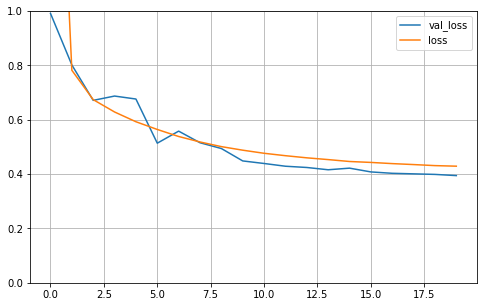

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

붉은색이 train의 비용함수, 파란색이 validation의 비용함수 입니다.

<b>(8) 최종적으로 예측된 주택 가격을 표출한다.</b><br>
<br>
아까 만들어두었던 데이터셋, X_new에 대한 결과 예측입니다.

In [21]:
print("input data: \n", X_new[0],"\n", X_new[1],"\n", X_new[2])
print("predicted price:\n" + str(y_pred))

input data: 
 [-1.15780104 -0.28673138 -0.49550877 -0.16618097 -0.02946012  0.38899735
  0.19374821  0.2870474 ] 
 [-0.7125531   0.10880952 -0.16332973  0.20164652  0.12842117 -0.11818174
 -0.23725261  0.06215231] 
 [-0.2156101   1.8491895  -0.57982788  0.18528489 -0.10429403 -0.67694905
  1.00890193 -1.4271529 ]
predicted price:
[[0.6615435]
 [1.6581012]
 [3.4396434]]
